# Superplots

In cell biology and neuroscience, we have to consider both the sample-to-sample or individual-to-individual differences and the cell-to-cell variability for our experiments. What is n? This depends on the population you want to compare. In general, it is the population of cells or the number of independent experiments unless you are interested in cell-to-cell variability. One approach to communicate variability is using "superplots" to show both summary statistics and the independent experiments within the dataset (**Figure 1**). 

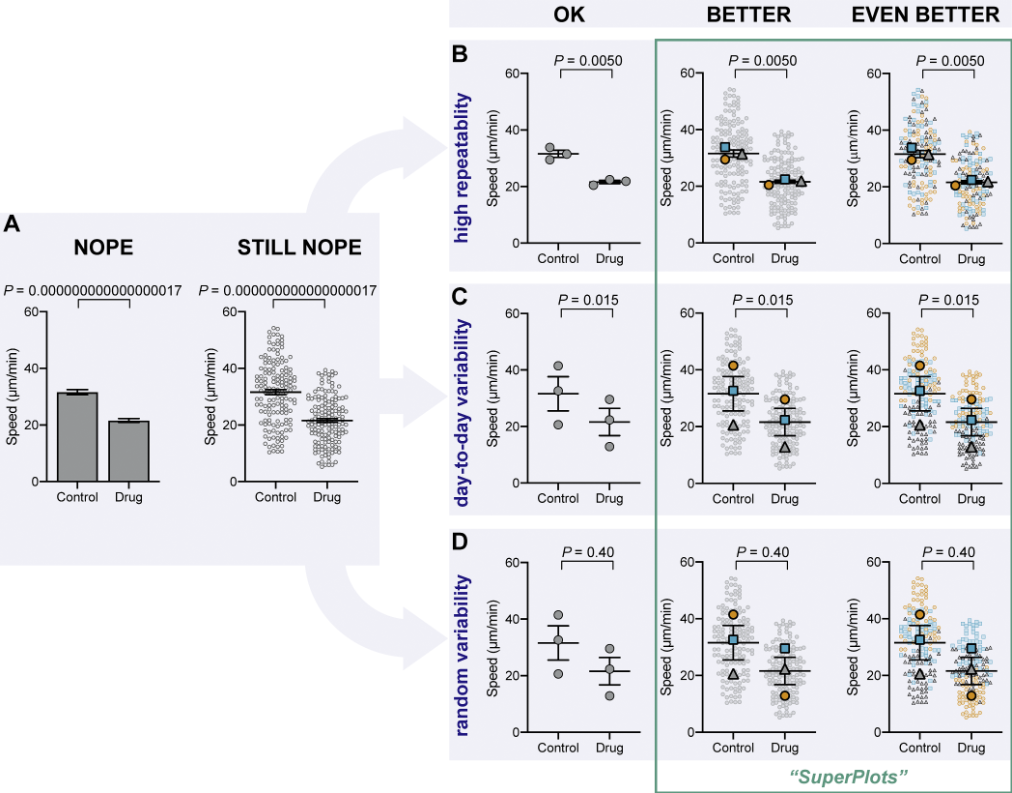


**Figure 1**. A. Plots with multiple observations and small error bars. B. Better plots to show the reproducibility of each experiment. Lord et al., 2020. 

**SuperPlots References**

This Jupyter notebook shows how to make SuperPlots in Python using matplotlib and seaborn. For making them with other tools, see below. 

* Lord et al., 2020. [SuperPlots: Communicating reproducibility and variability in cell biology](https://doi.org/10.1083/jcb.202001064). Tutorials for Excel, R, and Prism. 
* Goedhart, 2021. [SuperPlotsOfData—a web app for the transparent display and quantitative comparison of continuous data from different conditions](https://www.molbiolcell.org/doi/10.1091/mbc.E20-09-0583). Super plots of data by Joachim Goedhart (UvA). [Web application](https://huygens.science.uva.nl/SuperPlotsOfData/) based on the article by Lord et al., 2020.
* Kenny and Schoen, 2021. [Violin SuperPlots: visualizing replicate heterogeneity in large data sets](https://www.molbiolcell.org/doi/10.1091/mbc.E21-03-0130). Violin superplots by Martin Kenny and Ingmar Schoen. [GitHub](https://github.com/kynnemall/superviolin/tree/master). [Web app](https://superviolin.streamlit.app/) also available. Article: [Kenny and Schoen, 2021](https://www.molbiolcell.org/doi/10.1091/mbc.E21-03-0130). It also works from the Anaconda prompt. For more details, read the [documentation](https://github.com/kynnemall/superviolin/tree/master).

For more details, read the [documentation](https://github.com/kynnemall/superviolin/tree/master).

**Further references on replication**
- Eisner, 2021. Pseudoreplication in physiology: More means less. [Link](https://doi.org/10.1085/jgp.202012826)
- Kenny and Schoen, 2021. Violin SuperPlots: visualizing replicate heterogeneity in large data sets. [Link](https://www.molbiolcell.org/doi/10.1091/mbc.E21-03-0130).
- Lazic, 2010. The problem of pseudoreplication in neuroscientific studies: is it affecting your analysis? [Link](https://bmcneurosci.biomedcentral.com/articles/10.1186/1471-2202-11-5).
- Lazic et al., 2018. What exactly is ‘N’ in cell culture and animal experiments? [Link](https://doi.org/10.1371/journal.pbio.2005282). 
- Lord et al., 2020. SuperPlots: Communicating reproducibility and variability in cell biology. [Link](https://doi.org/10.1083/jcb.202001064).

## Nested analysis

In order to analyze the clustered or nested data, we can conservately consider only the mean of each replicate or use instead nested analysis to take into account both the variability of clusters and the multiple observations nested within each cluster. Clustered data arise when the data from the whole study can be classified into several different groups, referred to as clusters.

![image](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnmeth.3137/MediaObjects/41592_2014_Article_BFnmeth3137_Fig2_HTML.jpg?as=webp)

**Figure 2**. Examples of crossed and nested experiments. Source: Krzywinski et al, 2015.

**References**
- Aarts et al., 2015. Multilevel analysis quantifies variation in the experimental effect while optimizing power and preventing false positives. [Link](https://bmcneurosci.biomedcentral.com/articles/10.1186/s12868-015-0228-5). 
- Krzywinski et al., 2015. Nested analysis. [Link](https://www.nature.com/articles/nmeth.3137).
- Galbraith et al., 2010. A Study of Clustered Data and Approaches to Its Analysis. [Link](https://www.jneurosci.org/content/30/32/10601).


# Data example

The file `jcb_202001064_datas1.txt` is from the supplementary materials by [Lord et al., 2020](https://doi.org/10.1083/jcb.202001064). The file `cell_types_specimen_details.csv` can be downloaded [here](https://celltypes.brain-map.org/data). For a description of the features, download the electrophysiology and morphology [documentation](https://community.brain-map.org/t/documentation-cell-types-database/2845).

Go to `Example_files` > `superplots` > `jcb_202001064_datas1.txt`, `cell_types_specimen_details.csv`, download the files, and paste them into the 'Data_example' folder of the notebook after you create the paths. Alternatively, if you clone the repository, paste the `superplots` folder into the new `Data_examples` directory. After that, you can run all the cells of the notebook. 

# Import the libraries

Double-check that all the libraries listed below are installed.

For statistical annotations in Python, install [statannotations](https://github.com/trevismd/statannotations). See [Documentation](https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb). 

You can make superplots using the function `swarmplot` of the package seaborn. See [documentation](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn-swarmplot). Seaborn styles: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`.

Library versions I used for this notebook: Pandas 1.5.3, NumPy 1.23.5, Seaborn 0.11.2, Matplotlib 3.6.3, SciPy 1.9.3, Statsmodels 0.14.3, statannotations 0.5.0.

**Notes**:
- I had issues trying to install the latest version of 'statannotations'. However, `statannotations 0.5.0` does not seem to work with the latest seaborn version (I used `pip install seaborn==0.11.2`). You may also need to instal: `pip install --upgrade seaborn statannotations`. These incompatibilities between dependencies are always a problem if you use regular environments. 
- The attribute `register_cmap` has been removed in `matplotlib 3.9`. Upgrade `seaborn` (but see above) or install `matplotlib 3.8`.

In [ ]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics libraries
from scipy import stats
from scipy.stats import pearsonr
import scipy
from statannotations.Annotator import Annotator
import statsmodels.formula.api as smf


# Optional: Display all columns in table
pd.set_option('display.max_columns', None)

In [ ]:
import statannotations
print("Statsmodels version:", statannotations.__version__)


# Create the paths

In [ ]:
notebook_name = 'superplots'

# Data path to where you want to locate your folders 
data_path = os.getcwd()  # Default: current directory where the Jupyter notebook is located

# Change the folder names accordingly
paths = {'data': data_path,
         'raw_data':  f'{data_path}/Data_examples/{notebook_name}/',
         'processed_data': f'{data_path}/Processed_data_examples/{notebook_name}/',
         'analysis': f'{data_path}/Analysis_examples/{notebook_name}/',         
         'plots': f'{data_path}/Analysis_examples/{notebook_name}/Plots/'}

# Make folders if they do not exist yet
for path in paths.values():
    os.makedirs(path, exist_ok=True)

# Superplots and statistics for 2 groups

## Load the dataset

In [ ]:
dataset1 = pd.read_csv(f"{paths['raw_data']}/jcb_202001064_datas1.txt")
dataset1

## Define the variables

In [ ]:
# Define the variables for testing and plotting
groupedby_variable = 'Treatment'
group1 = 'Control'
group2 = 'Drug'
groups_order = [group1, group2]
replicates = 'Replicate'
feature = 'Speed'

# Groupby the dataset
groupby_dataset = dataset1[dataset1[groupedby_variable].isin([group1, group2])]

# Calculate replicate averages
replicates_avg = dataset1.groupby([groupedby_variable,replicates], as_index=False).agg({feature: "mean"})

# Pivot table for statistics
replicates_avg_pivot = replicates_avg.pivot_table(columns=groupedby_variable, values=feature, index=replicates)

group_size = groupby_dataset.groupby(groupedby_variable).size()
print("Group size (n):", group_size)

replicates_avg

## Statistical tests

I show some examples for statistical analysis. See the links above and the 'Readme' for references on statistics.

In [ ]:
# Unpaired t-test using scipy
statistic, p_value = scipy.stats.ttest_ind(replicates_avg_pivot[group1], replicates_avg_pivot[group2], nan_policy='omit')
statistic_replicates, p_value_replicates = scipy.stats.ttest_ind(dataset1[dataset1[groupedby_variable] == group1][feature], 
                                                                dataset1[dataset1[groupedby_variable] == group2][feature],
                                                                nan_policy='omit')

# Nested analysis
mixedlm_model = smf.mixedlm(f"{feature} ~ {groupedby_variable}",  # mixed-effects formula
                            dataset1, 
                            groups=dataset1[replicates])  # Group labels for random effects

mixedlm_result = mixedlm_model.fit()
pvalue_mixedlm = mixedlm_result.pvalues

# # Print the results
p_value_avg = str(float(round(p_value, 4))) 
print("T-test p-value (replicates)", p_value_replicates)
print("T-test p-value (averages):", p_value_avg)
# Complete results of the mixed linear model
print(mixedlm_result.summary())

## Plot

Comment or uncomment option A (statsmodel) or B (custom annotation) for statistical annotation. Nevertheless, automatic statistical annotation in Python has some room for improvement. 

In [ ]:
# Set seaborn style
sns.set(style="ticks",  rc={'figure.figsize':(5, 5)}, font_scale=1.4)
palette = sns.color_palette("colorblind")

# Create figure and axis objects
fig, ax = plt.subplots()

# Swarm plot using seaborn. Use hue variable for replicates. Datapoints below error bars: zorder=0
sns.swarmplot(x=groupedby_variable, y=feature, hue=replicates, palette='colorblind', 
              size=5, data=dataset1, alpha=0.7, zorder=0, order=groups_order)

# Averages of each replicate in the swarm plot
ax = sns.swarmplot(x=groupedby_variable, y=feature, hue=replicates, palette='colorblind', 
                   size=15, edgecolor="k", linewidth=2, data=replicates_avg, order=groups_order)

#  Optional: Plot replicate averages with error bars using 'barplot' or 'pointplot'.
sns.pointplot(x=groupedby_variable, y=feature, data=replicates_avg, 
              marker="_", markersize=50, order=groups_order,
              errorbar="sd", color="black", capsize=0.1, linestyles="None", legend=False)

# Option A for statistical annotation: statsmodel
# annotator = Annotator(ax, pairs=[(group1, group2)],  
#                       data=replicates_avg, x=groupedby_variable, y=feature,
#                       order=groups_order)
# annotator.configure(test='t-test_ind', text_format='star', loc='outside')
# annotator.apply_and_annotate()

# Option B for statistical annotation: custom
x1, x2 = 0, 1  # set the start and end positions of the line
y = dataset1[feature].max()  # set the height of the line
ax.hlines(y=y*1.1, xmin=x1, xmax=x2, color='k', linewidth=1)  # Add a horizontal line for p-value annotation
ax.text((x1 + x2) / 2, y*1.1, f"P = {p_value_avg}", ha='center', va='bottom', color='k')  # p-value from averages

# Plot parameters
sns.despine()  # Remove top and right spines
ax.legend_.remove()
# sns.move_legend(ax, "center left", bbox_to_anchor=(1.3, 0.5), title=replicates)  # Optional


# Tight layout
plt.tight_layout()

plt.savefig(paths['plots'] + feature + '_superplot_2groups.png')

plt.show()

# Superplots and statistics for more than 2 groups

For nested ANOVA, see [Krzywinski et al., 2014](https://www.nature.com/articles/nmeth.3137).

## Dataset

**Note**. I used this open dataset for example purposes. In patch-clamp electrophysiology, the cell can be considered the biological unit of interest.

In [ ]:
dataset2 = pd.read_csv(f"{paths['raw_data']}/cell_types_specimen_details.csv")
dataset2

## Features

In [ ]:
# Assign a new variable for the filtered dataset
filtered_dataset = dataset2[dataset2['donor__species'] == 'Mus musculus']

selected_columns = ['structure__acronym', 'structure__layer', 'line_name']

for column in selected_columns:
    # Get unique values for the specified column
    unique_values = filtered_dataset[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

## Define the variables

In [ ]:
# Define the variables for testing and plotting
groupedby_variable = 'line_name'
group1 = 'Vip-IRES-Cre'
group2 = 'Pvalb-IRES-Cre'
group3 = 'Sst-IRES-Cre'
groups_order = [group1, group2, group3]
replicates = 'structure__layer'
feature = 'nr__number_bifurcations'

# Filter the dataset for the relevant groups
groupedby_dataset = dataset2[dataset2[groupedby_variable].isin(groups_order)]

# Calculate replicate averages and standard deviations
replicates_avg = groupedby_dataset.groupby([groupedby_variable, replicates], as_index=False).agg({feature: "mean"})

# Pivot table for statistics
replicates_avg_pivot = replicates_avg.pivot_table(columns=groupedby_variable, values=feature, index=replicates)

# Groupby the dataset to get the size of each group
group_size = groupedby_dataset.groupby(groupedby_variable).size()
print("Group size (n):", group_size)

replicates_avg_pivot

## Normality test

In [ ]:
normality_results = {}

# Loop through each group to perform the normality test
for group in groups_order:
    # Filter the dataset for the current group
    group_data = groupedby_dataset[groupedby_dataset[groupedby_variable] == group][feature].dropna()
    
    # Check if there's enough data to perform the test
    if len(group_data) > 0:
        # Perform the normality test (D'Agostino and Pearson's test)
        stat, p_value = stats.normaltest(group_data)
        
        # Store the result in the dictionary
        normality_results[group] = {"Statistics": stat, "p-value": p_value}
normality_results_df = pd.DataFrame(normality_results).T  # Transpose to have groups as rows
normality_results_df

## Statistical tests

[Mixed linear model (statsmodels)](https://www.statsmodels.org/stable/mixed_linear.html):
* Intercept: The estimated intercept coefficient. Indicating the expected value of the feature when all other predictors are zero.
* Predictor variable: Expected change of the dependet variable (feature) for each unit increase in the variable.
* Group Variance: The variance component associated with the grouping structure, capturing variability between different groups

In [ ]:
# One-way ANOVA for all data
dataset_replicates = []
for column in groupedby_dataset[groupedby_variable].unique():
    dataset_replicates.append(groupedby_dataset[groupedby_dataset[groupedby_variable] == column][feature].dropna())
fvalue, pvalue = scipy.stats.f_oneway(*dataset_replicates)

# One-way ANOVA for the averages
dataset_averages = []
for column in replicates_avg_pivot.columns:
    dataset_averages.append(replicates_avg_pivot[column].dropna())
fvalue_averages, pvalue_averages = scipy.stats.f_oneway(*dataset_averages)
pvalue_averages = str(float(round(pvalue_averages, 4))) 

# Mixed linear model (replicates)
mixedlm_columns = [feature, groupedby_variable, replicates]
mixedlm_dataset = groupedby_dataset.dropna(subset=mixedlm_columns)
mixedlm_model = smf.mixedlm(f"{feature} ~ {groupedby_variable}",  # fixed effects
                            data=mixedlm_dataset, groups=mixedlm_dataset[replicates])  # random effects
mixedlm_results = mixedlm_model.fit()
pvalue_mixedlm = mixedlm_results.pvalues

# # Mixed linear model (averages)
# mixedlm_model_averages = smf.mixedlm(f"{feature} ~ {groupedby_variable}",  # fixed effects
#                                      data=replicates_avg, groups=replicates)  # random effects
# mixedlm_results_averages = mixedlm_model_averages.fit()
# pvalue_mixedlm_averages = mixedlm_results_averages.pvalues

# Print the results
print("One-way ANOVA (averages):", "F-value =", fvalue_averages, "P-value =", pvalue_averages)
print("One-way ANOVA (replicates):", "F-value =", fvalue, "P-value =", pvalue)
print("Replicates", mixedlm_results.summary())
# print("Averages", mixedlm_results_averages.summary())

## Plot

In [ ]:
# Set seaborn style
sns.set(style="ticks",  rc={'figure.figsize':(8, 9)}, font_scale=1.4)
palette = sns.color_palette("colorblind")

# Swarm plot using seaborn. Use hue variable for replicates. Datapoints below error bars: zorder=0
sns.swarmplot(x=groupedby_variable, y=feature, hue=replicates, palette='colorblind', 
              size=4, data=groupedby_dataset, alpha=0.7, zorder=0, order=groups_order)

# Averages of each replicate in the swarm plot
ax = sns.swarmplot(x=groupedby_variable, y=feature, hue=replicates, palette='colorblind', 
                   size=15, edgecolor="k", linewidth=2, data=replicates_avg, order=groups_order)

# Optional: multiple t-test comparisons
pairs = [(group1, group2), (group1, group3), (group2, group3)]
annotator = Annotator(ax, pairs=pairs, data=replicates_avg, x=groupedby_variable, y=feature)
annotator.configure(test='t-test_ind', comparisons_correction="Bonferroni", text_format='star', loc='outside', verbose=3)
annotator.apply_test()
ax, test_results = annotator.annotate()

# Optional: P-value from one-way ANOVA
x_mid = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x_mid, groupedby_dataset[feature].max() * 1.4, f"One-way ANOVA P = {pvalue_averages}", ha='center', va='bottom', color='k')

# Plot parameters
sns.despine()  # Remove top and right spines
# ax.legend_.remove()  # Remove legend of the averages
plt.xticks(rotation=45) 

# Manually create the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title=replicates, 
          loc="center left", bbox_to_anchor=(1.3, 0.5))

# Tight layout
plt.tight_layout()

plt.savefig(paths['plots'] + feature + '_superplot_multiplegroups.png')

plt.show()